# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Microsoft) </font>

In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'MSFT'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000,18.356850,38794500
2003-10-21,29.350000,29.430000,29.170000,29.350000,18.356850,44166800
2003-10-22,29.030001,29.209999,28.799999,28.889999,18.069145,48798500
2003-10-23,28.719999,29.080000,28.100000,28.910000,18.081654,67357900
2003-10-24,27.270000,27.400000,26.420000,26.610001,16.643126,210558300
...,...,...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011,327.066193,21072400
2023-10-16,331.049988,336.140015,330.600006,332.640015,331.966248,22158000
2023-10-17,329.589996,333.459991,327.410004,332.059998,331.387390,18338500


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [5]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,85.317498,86.172647,84.447170,85.342371,79.210731,4.703265e+07
std,90.518917,91.473685,89.529900,90.542409,91.530043,2.884883e+07
min,15.200000,15.620000,14.870000,15.150000,11.304623,7.425600e+06
25%,27.209999,27.430000,27.010000,27.230000,19.988474,2.673180e+07
50%,35.880001,36.060001,35.490002,35.740002,29.592783,4.071710e+07
75%,107.170002,108.139999,105.785000,107.009998,101.413071,5.954170e+07
max,361.750000,366.779999,352.440002,359.489990,358.003876,5.910522e+08


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [7]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [8]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

In [10]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20     18.356850
2003-10-21     18.356850
2003-10-22     18.069145
2003-10-23     18.081654
2003-10-24     16.643126
                 ...    
2023-10-13    327.066193
2023-10-16    331.966248
2023-10-17    331.387390
2023-10-18    329.441345
2023-10-19    330.648895
Name: Adj Close, Length: 5035, dtype: float64

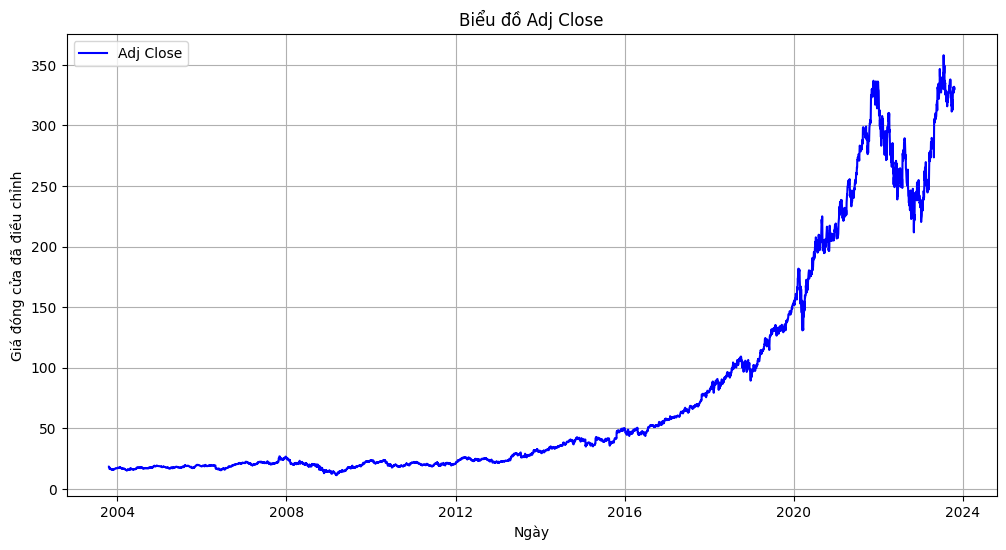

In [11]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Chọn các cột trừ cột 'Adj Close' làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close'])
X

,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000,38794500
2003-10-21,29.350000,29.430000,29.170000,29.350000,44166800
2003-10-22,29.030001,29.209999,28.799999,28.889999,48798500
2003-10-23,28.719999,29.080000,28.100000,28.910000,67357900
2003-10-24,27.270000,27.400000,26.420000,26.610001,210558300
...,...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011,21072400
2023-10-16,331.049988,336.140015,330.600006,332.640015,22158000
2023-10-17,329.589996,333.459991,327.410004,332.059998,18338500


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 5)
(1007, 5)
(4028,)
(1007,)


In [15]:
X_train

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09,50.490002,50.590000,50.000000,50.070000,17951600
2006-03-01,26.980000,27.200001,26.950001,27.139999,53061200
2016-01-06,54.320000,54.400002,53.639999,54.049999,39518900
2006-04-13,27.080000,27.200001,27.000000,27.070000,28160000
2005-08-03,26.760000,27.430000,26.730000,27.250000,139422400
...,...,...,...,...,...
2021-05-20,243.960007,247.949997,243.860001,246.479996,21800700
2005-08-25,26.900000,27.090000,26.850000,27.030001,39306300
2016-02-02,54.169998,54.259998,52.650002,53.000000,56313800


In [16]:
X_test

,Open,High,Low,Close,Volume
Date,,,,,
2018-04-09,91.040001,93.169998,90.620003,90.769997,31533900
2022-06-09,267.779999,272.709991,264.630005,264.790009,26439700
2012-12-12,27.530001,27.620001,27.080000,27.240000,43966300
2020-08-31,227.000000,228.699997,224.309998,225.529999,28774200
2008-11-04,23.129999,23.660000,22.870001,23.530001,72123000
...,...,...,...,...,...
2013-10-22,35.020000,35.099998,34.520000,34.580002,40438500
2018-03-14,95.120003,95.410004,93.500000,93.849998,32132000
2005-08-22,26.790001,27.170000,26.770000,26.910000,41691700


In [17]:
y_train

Date
2016-05-09     44.814976
2006-03-01     19.271479
2016-01-06     48.032375
2006-04-13     19.221783
2005-08-03     19.171005
                 ...    
2021-05-20    241.142014
2005-08-25     19.072643
2016-02-02     47.099293
2018-10-12    103.599792
2007-03-22     20.365881
Name: Adj Close, Length: 4028, dtype: float64

In [18]:
y_test

Date
2018-04-09     85.126198
2022-06-09    261.170837
2012-12-12     22.263931
2020-08-31    219.058075
2008-11-04     17.320711
                 ...    
2013-10-22     28.899141
2018-03-14     88.014671
2005-08-22     18.987963
2023-05-08    306.703552
2008-10-31     16.437380
Name: Adj Close, Length: 1007, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [19]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Microsoft.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [20]:
X_train, X_train.shape

(array([[0.10183235, 0.09958424, 0.1040673 , 0.1014114 , 0.0180355 ],
        [0.03399221, 0.03297642, 0.03578517, 0.03482024, 0.07819315],
        [0.11288414, 0.110434  , 0.11485025, 0.11296974, 0.05498944],
        ...,
        [0.1124513 , 0.11003531, 0.11191753, 0.10992043, 0.08376623],
        [0.27069688, 0.27229752, 0.27327666, 0.27420573, 0.06907927],
        [0.03843601, 0.03682082, 0.03892526, 0.03810188, 0.06940962]]),
 (4028, 5))

In [21]:
X_test,X_test.shape

(array([[0.21884288, 0.2208395 , 0.22439791, 0.21960852, 0.04130775],
        [0.72884143, 0.73211639, 0.73987618, 0.72498117, 0.03257922],
        [0.03557928, 0.03417246, 0.03617028, 0.03511065, 0.06260972],
        ...,
        [0.03344395, 0.03289099, 0.03525195, 0.03415229, 0.05871237],
        [0.85104604, 0.8388769 , 0.86269513, 0.85235524, 0.0238046 ],
        [0.02115135, 0.02075977, 0.02147703, 0.02085149, 0.14671984]]),
 (1007, 5))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [22]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [24]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [25]:
y_pred.shape

(1007,)

In [26]:
y_test.shape

(1007,)

In [27]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 1.9185524212414833
R-squared (R2) Score: 0.9997693520933287
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 2.1101127844854615
R-squared (R2) Score: 0.9997548663950527


In [28]:
print(y_test)

Date
2018-04-09     85.126198
2022-06-09    261.170837
2012-12-12     22.263931
2020-08-31    219.058075
2008-11-04     17.320711
                 ...    
2013-10-22     28.899141
2018-03-14     88.014671
2005-08-22     18.987963
2023-05-08    306.703552
2008-10-31     16.437380
Name: Adj Close, Length: 1007, dtype: float64


In [29]:
print(y_pred)

[ 85.09937018 261.16393906  20.6462197  ...  20.33681562 304.36328751
  15.17266999]


In [30]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,85.126198,85.099370
2022-06-09,261.170837,261.163939
2012-12-12,22.263931,20.646220
2020-08-31,219.058075,220.871057
2008-11-04,17.320711,16.606690
2013-04-17,23.758566,22.126331
2004-10-04,17.639437,21.298939
2020-09-14,199.515427,200.881741
2020-04-17,172.575836,173.180915


<Axes: xlabel='Date'>

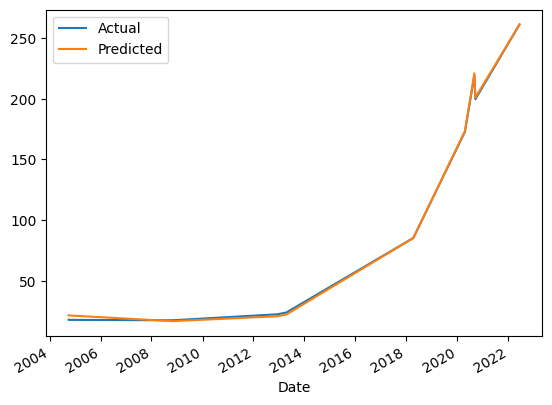

In [31]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [32]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Microsoft.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)